# **DATA CLEANING**

## Objectives

* Remove duplicate records from the dataset
* Handle missing values
* Remove outliers and invalid data points

## Inputs

* Raw dataset

## Outputs

* Cleaned dataset ready for analysis


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [4]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/P5-Heritage-Housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [5]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [6]:
current_dir = os.getcwd()
current_dir

'/workspace/P5-Heritage-Housing'

## LOAD DATA

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

house_prices_df = pd.read_csv(f"/workspace/P5-Heritage-Housing/outputs/datasets/collection/house_prices.csv")
house_prices_df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


## Data Exploration

In [8]:
vars_missing_data = house_prices_df.columns[house_prices_df.isna().sum() > 0].to_list()
vars_missing_data

['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtExposure',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

In [ ]:
import pandas as pd
import ipywidgets as widgets
from ydata_profiling import ProfileReport


if vars_missing_data:
    profile = ProfileReport(house_prices_df[vars_missing_data], minimal=True)
    profile.to_notebook_iframe()
else:
    print("There are no variables with missing data.")

---

## Data Cleaning

### Sorted Missing Data Percentages

In [9]:
def EvaluateMissingData(house_prices_df):
    missing_data = house_prices_df.isnull().sum()
    missing_data_percentage = round(missing_data/len(house_prices_df)*100, 2)
    df_missing_data = (pd.DataFrame(
                            data = {"Rows With Missing Data": missing_data,
                                    "PercentageOfDataset": missing_data_percentage,                              
                                    "Data Type": house_prices_df.dtypes}
                                    )
                            .sort_values(by=['PercentageOfDataset'], ascending=False)
                            .query("PercentageOfDataset > 0")
                          )
    return df_missing_data

EvaluateMissingData(house_prices_df)

,Rows With Missing Data,PercentageOfDataset,Data Type
EnclosedPorch,1324,90.68,float64
WoodDeckSF,1305,89.38,float64
LotFrontage,259,17.74,float64
GarageFinish,235,16.10,object
BsmtFinType1,145,9.93,object
BedroomAbvGr,99,6.78,float64
2ndFlrSF,86,5.89,float64
GarageYrBlt,81,5.55,float64
BsmtExposure,38,2.60,object
MasVnrArea,8,0.55,float64


### Dealing with Missing Data

- This function code is directly pulled from "Feature Engine Unit 9: Custom Functions" lesson video.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline

def DataCleaningEffect(df_original,df_cleaned,variables_applied_with_method):

  flag_count=1 # Indicate plot number
  
  # distinguish between numerical and categorical variables
  categorical_variables = df_original.select_dtypes(exclude=['number']).columns 

  # scan over variables, 
    # first on variables that you applied the method
    # if the variable is a numerical plot, a histogram if categorical plot a barplot
  for set_of_variables in [variables_applied_with_method]:
    print("\n=====================================================================================")
    print(f"* Distribution Effect Analysis After Data Cleaning Method in the following variables:")
    print(f"{set_of_variables} \n\n")
  

    for var in set_of_variables:
      if var in categorical_variables:  # it is categorical variable: barplot
        # I was getting index error so I've added some to reset index when creating dataframe
        df1 = pd.DataFrame({"Type":"Original","Value":df_original[var]}).reset_index(drop=True)
        df2 = pd.DataFrame({"Type":"Cleaned","Value":df_cleaned[var]}).reset_index(drop=True)
        dfAux = pd.concat([df1, df2], axis=0, ignore_index=True) # ignore_index=True is added to solve index error.
        fig , axes = plt.subplots(figsize=(15, 5))
        sns.countplot(hue='Type', data=dfAux, x="Value",palette=['#432371',"#FAAE7B"])
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.xticks(rotation=90)
        plt.legend() 

      else: # it is numerical variable: histogram

        fig , axes = plt.subplots(figsize=(10, 5))
        sns.histplot(data=df_original, x=var, color="#432371", label='Original', kde=True,element="step", ax=axes)
        sns.histplot(data=df_cleaned, x=var, color="#FAAE7B", label='Cleaned', kde=True,element="step", ax=axes)
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.legend() 

      plt.show()
      flag_count+= 1

### Summary of Cleaning Process

- Median imputation will be applying to '2ndFlrSF', 'BedroomAbvGr', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea'. When the column's distribution is not normal, the median provides a better central tendency measure than the mean and it also has not high missing percentage.
- 'EnclosedPorch', 'WoodDeckSF' will be dropping as we've mentioned earlier. They have a high percentage of missing values, so that it seems unreliable.

- Categorical imputation will be applying to 'GarageFinish' and 'BsmtFinType1'.

---

### Split Train and Test Datasets

In [11]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        house_prices_df,
                                        house_prices_df['SalePrice'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet rows and columns : {TrainSet.shape} \nTestSet rows and columns: {TestSet.shape}")

TrainSet rows and columns : (1168, 24) 
TestSet rows and columns: (292, 24)


In [12]:
df_missing_data = EvaluateMissingData(TrainSet)
df_missing_data

,Rows With Missing Data,PercentageOfDataset,Data Type
EnclosedPorch,1056,90.41,float64
WoodDeckSF,1034,88.53,float64
LotFrontage,212,18.15,float64
GarageFinish,184,15.75,object
BsmtFinType1,114,9.76,object
BedroomAbvGr,80,6.85,float64
2ndFlrSF,60,5.14,float64
GarageYrBlt,58,4.97,float64
BsmtExposure,28,2.40,object
MasVnrArea,6,0.51,float64


In [13]:
df_missing_data = EvaluateMissingData(TestSet)
df_missing_data

,Rows With Missing Data,PercentageOfDataset,Data Type
WoodDeckSF,271,92.81,float64
EnclosedPorch,268,91.78,float64
GarageFinish,51,17.47,object
LotFrontage,47,16.10,float64
BsmtFinType1,31,10.62,object
2ndFlrSF,26,8.90,float64
GarageYrBlt,23,7.88,float64
BedroomAbvGr,19,6.51,float64
BsmtExposure,10,3.42,object
MasVnrArea,2,0.68,float64


NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

### Imputation

In [14]:
from feature_engine.imputation import CategoricalImputer
from feature_engine.imputation import MeanMedianImputer
from feature_engine.selection import DropFeatures

median_imp =  ['2ndFlrSF', 'BedroomAbvGr', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea']
dropped = ['EnclosedPorch', 'WoodDeckSF']
cat_imp = ['BsmtFinType1', 'GarageFinish', 'BsmtExposure']

#### Median Imputation

- As we explained above, if the missing data percentage isn't high and the distribution is not normal curved (bell-shaped), we can implement the median imputation.


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['2ndFlrSF', 'BedroomAbvGr', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea'] 




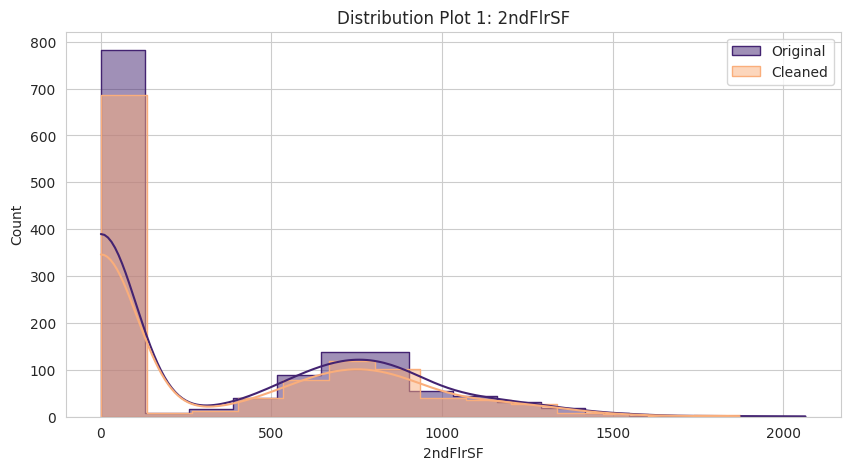

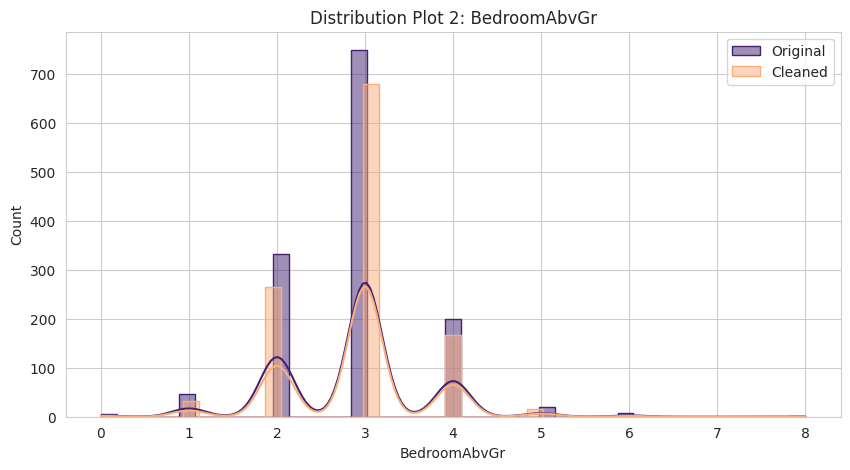

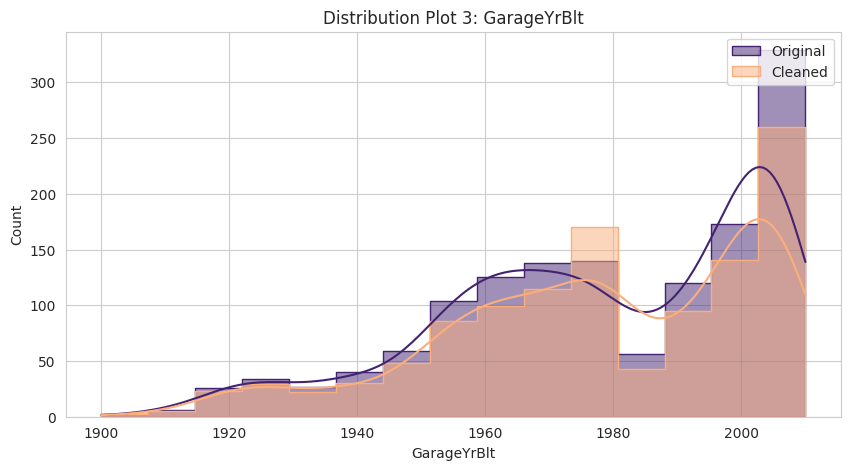

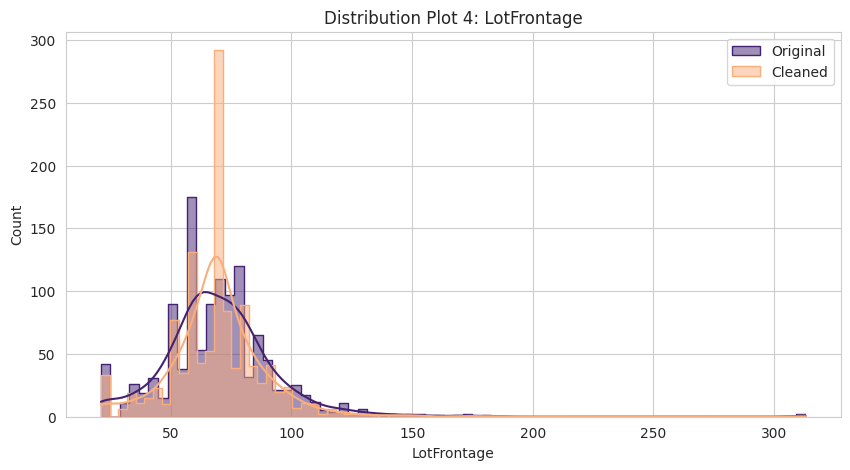

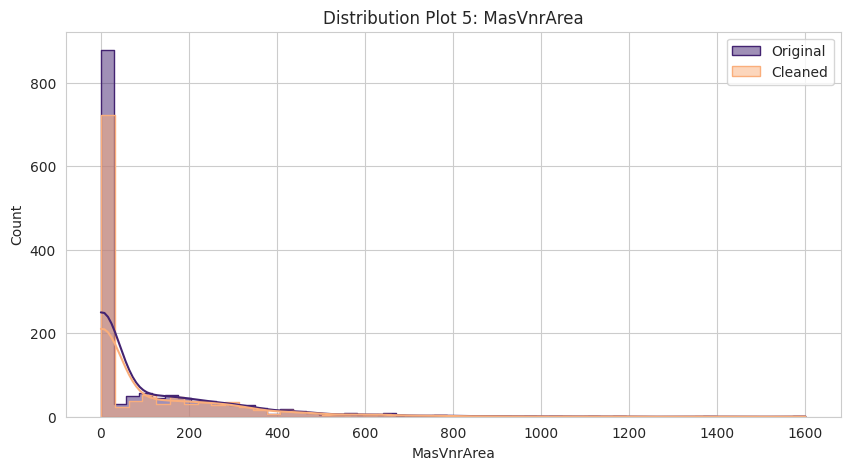

In [15]:

variables_method = median_imp
imputer = MeanMedianImputer(imputation_method='median', variables=variables_method)
df_method = imputer.fit_transform(TrainSet)

DataCleaningEffect(df_original=house_prices_df,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_method)

### Observations on Median Imputation
- 2ndFlrSF - The imputation has added missing data in 0 - 1000 range, has not changed a lot, so it is acceptable.
- BedroomAbvGr - The imputation has decreased in the 3 bedroom ranges.
- GarageYrBlt - There is often a decrease.
- LotFrontage - The imputation is seriously affecting the range between the lowest and highest amount.
- MasVnrArea - The cleaned data has remained pretty much the same.

### Categorical Imputation


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['BsmtFinType1', 'GarageFinish', 'BsmtExposure'] 




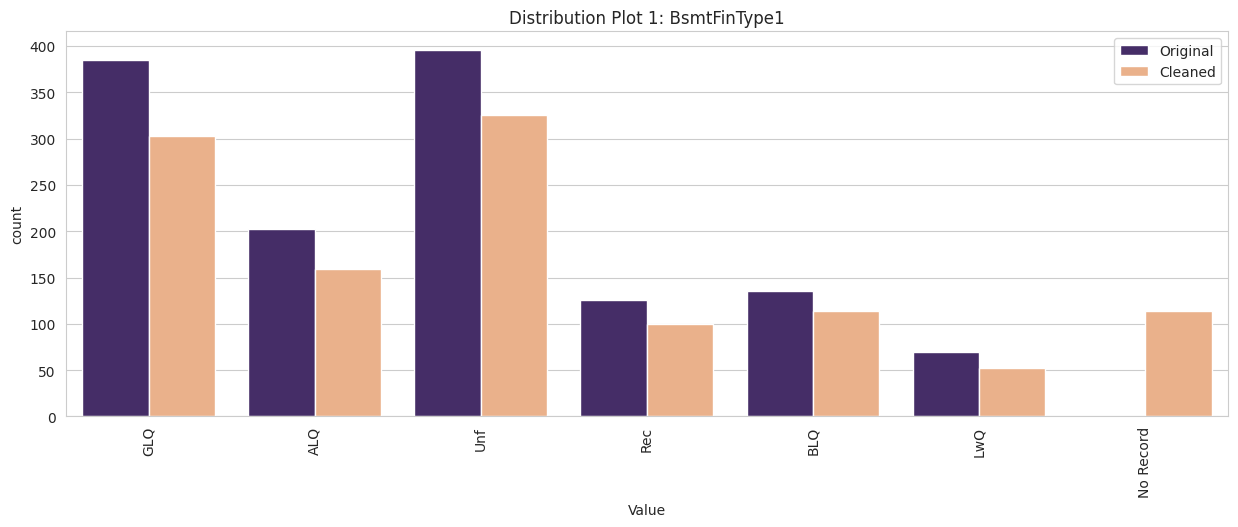

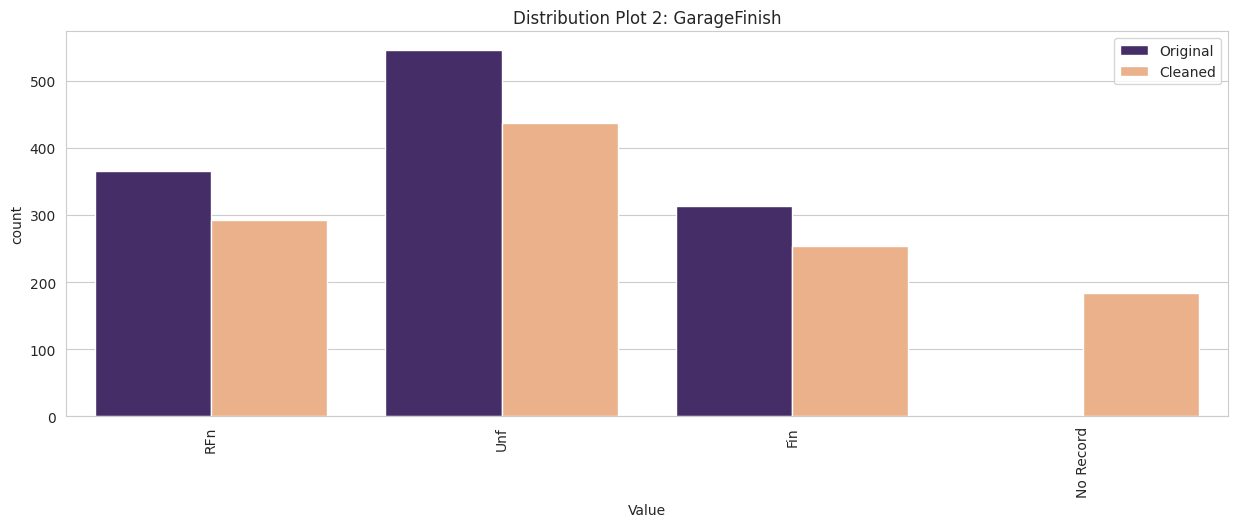

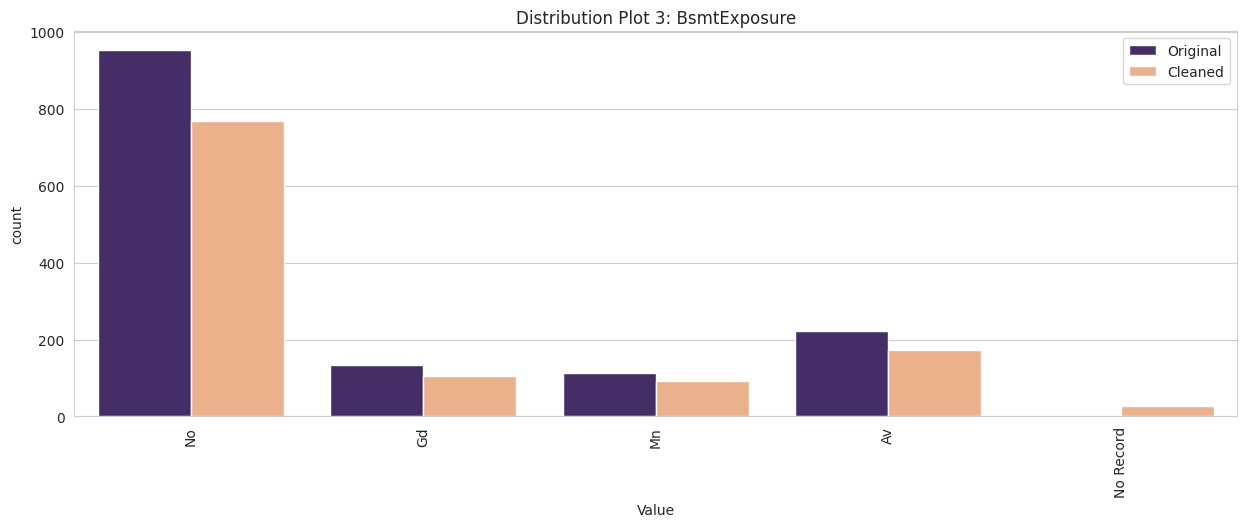

In [16]:
from feature_engine.imputation import CategoricalImputer

variables_method = cat_imp

imputer = CategoricalImputer(imputation_method='missing', 
                           fill_value='No Record', 
                           variables=variables_method)
df_method = imputer.fit_transform(TrainSet)

DataCleaningEffect(df_original=house_prices_df,
                  df_cleaned=df_method,
                  variables_applied_with_method=variables_method)

In [17]:
print(TrainSet[variables_method].isnull().sum())
print(df_method[variables_method].isnull().sum())

BsmtFinType1    114
GarageFinish    184
BsmtExposure     28
dtype: int64
BsmtFinType1    0
GarageFinish    0
BsmtExposure    0
dtype: int64


### Pipeline

In [18]:
pipeline = Pipeline([
      ('Median', MeanMedianImputer(imputation_method='median', 
                                   variables=['2ndFlrSF', 'BedroomAbvGr', 'GarageYrBlt', 
                                              'LotFrontage', 'MasVnrArea']
                                              )),
      ('CategoricalImputer', CategoricalImputer(imputation_method='missing', 
                                                fill_value='No Record', 
                                                variables=['BsmtFinType1','GarageFinish', 'BsmtExposure']
                                                )),
      ('Drop', DropFeatures(features_to_drop=['EnclosedPorch', 'WoodDeckSF']))
])
pipeline

Pipeline(steps=[('Median',
                 MeanMedianImputer(variables=['2ndFlrSF', 'BedroomAbvGr',
                                              'GarageYrBlt', 'LotFrontage',
                                              'MasVnrArea'])),
                ('CategoricalImputer',
                 CategoricalImputer(fill_value='No Record',
                                    variables=['BsmtFinType1', 'GarageFinish',
                                               'BsmtExposure'])),
                ('Drop',
                 DropFeatures(features_to_drop=['EnclosedPorch',
                                                'WoodDeckSF']))])

#### Fit Pipeline

In [19]:
pipeline.fit(TrainSet)

TrainSet, TestSet = pipeline.transform(TrainSet) , pipeline.transform(TestSet)

In [20]:
pipeline.fit(house_prices_df)

house_prices_df = pipeline.transform(house_prices_df)

#### Evaluation

In [21]:
EvaluateMissingData(TrainSet)

,Rows With Missing Data,PercentageOfDataset,Data Type


In [22]:
EvaluateMissingData(TestSet)

,Rows With Missing Data,PercentageOfDataset,Data Type


In [23]:
EvaluateMissingData(house_prices_df)

,Rows With Missing Data,PercentageOfDataset,Data Type


# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [24]:
import os
try:
  # create here your folder
  os.makedirs(name='/workspace/P5-Heritage-Housing/outputs/datasets/collections/')
except Exception as e:
  print(e)

#### Dataset

In [ ]:
house_prices_df.to_csv(f"/workspace/P5-Heritage-Housing/outputs/datasets/collection/cleaned/CleanedHousePrices.csv", index=False)

#### TrainSet

In [ ]:
TrainSet.to_csv(f"/workspace/P5-Heritage-Housing/outputs/datasets/collection/cleaned/CleanedTrainSet.csv", index=False)

#### TestSet

In [ ]:
TestSet.to_csv(f"/workspace/P5-Heritage-Housing/outputs/datasets/collection/cleaned/CleanedTestSet.csv", index=False)